In [30]:
import warnings
from numba import jit
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import random
import math
from sklearn.cluster import KMeans
warnings.filterwarnings('ignore')

# Kmeans Clustering

In [31]:
# READ DATASET
df = pd.read_csv('./kendaraan_train_clean.csv')
df.sample(8)


,Umur,Kode_Daerah,Kanal_Penjualan,Lama_Berlangganan
222468,0.943827,1.439555,0.000000,0.143552
123601,-0.772807,0.278260,0.226793,1.233820
172576,-0.970880,1.052457,0.756800,1.454323
236822,2.264314,-1.424972,0.226793,0.000000
261086,1.009851,0.000000,0.226793,-1.644978
216545,-1.102929,0.000000,0.908230,-1.069219
89281,-1.168953,0.278260,0.756800,1.650327
170865,-0.178588,1.516975,-1.552515,-1.326473


## Memilih 2 kolom dengan nilai korelasi tertinggi

In [32]:
SELECTED_COLUMN=["Kanal_Penjualan", "Umur"]
df_clean = df[SELECTED_COLUMN]
df_clean.head()

,Kanal_Penjualan,Umur
0,0.756800,-0.574734
1,-1.571444,0.613705
2,0.908230,-1.168953
3,0.226793,1.273948
4,-0.454644,0.745754


## Membuat fungsi kmeans

In [33]:
@jit #comment this line if you can't run this file
def euclidean(x, y):
    return math.sqrt(sum((x - y)**2))
    
def initCentroid(k, df):
  return {i: df[random.randint(0, len(df))] for i in range(k)}

@jit
def kmeans(k, max_iter, df):
    # inisiasi centroid
    centroid = initCentroid(k, df)
    sum_wcss = 0
    print("="*40)
    print("INIT CENTROID")
    # menampilkan nilai cluster ke i
    for i in range(k):
      print(f"Klaster {i+1}: {centroid.get(i)}")
    # membuat duplikat nilai centroid sekarang
    temp_centroid = centroid.copy()
    for i in range(max_iter):
        # membuat cluster baru
        cluster = {i: [] for i in range(k)}
        tmp = []        
        for x in df:
            # mencari nilai centroid terdekat
            # dengan metode euclidean
            dist = [euclidean(x, centroid[c]) for c in centroid]
            tmp.append(min(dist))
            cluster[dist.index(min(dist))].append(x)
        sum_wcss = sum(tmp)
        for cl in cluster:
            centroid[cl] = np.mean(cluster[cl], axis=0)
        print("="*40)
        print(f"ITERASI KE-{i+1}")
        # menampilkan nilai per klaster
        for cl in range(k):
          print(f"Klaster {cl+1}: {centroid.get(cl)}")
        # berhenti jika nilai centroid sebelumnya sama dengan sekarang
        isMatch = True
        for j in range(k):
          if (temp_centroid.get(j) != centroid.get(j))[0]:
            isMatch = False
        if isMatch:
          print(f"BERHENTI PADA ITERASI KE {i+1}")
          break
        temp_centroid = centroid.copy()
    return centroid, cluster, sum_wcss

## Membuat konstanta nilai K dan maksimum iterasi

In [34]:
NUM_K = 3
MAX_ITER = 100

## Menjalankan clustering

In [35]:
data = df_clean.to_numpy()
centroid, cluster, _ = kmeans(NUM_K, MAX_ITER, data)

INIT CENTROID
Klaster 1: [0.22679287 0.41563173]
Klaster 2: [ 0.75679954 -1.16895293]
Klaster 3: [ 0.22679287 -0.17858751]
ITERASI KE-1
Klaster 1: [-0.6335666   1.01758987]
Klaster 2: [ 0.7466425  -0.95746685]
Klaster 3: [-0.101514   -0.26627352]
ITERASI KE-2
Klaster 1: [-0.96490934  1.12889605]
Klaster 2: [ 0.75821858 -0.85279898]
Klaster 3: [-0.03565915 -0.02683231]
ITERASI KE-3
Klaster 1: [-1.22914897  1.08447833]
Klaster 2: [ 0.73987568 -0.85190095]
Klaster 3: [0.15981679 0.23124809]
ITERASI KE-4
Klaster 1: [-1.48172141  0.90233258]
Klaster 2: [ 0.72633328 -0.85532104]
Klaster 3: [0.31363284 0.52777596]
ITERASI KE-5
Klaster 1: [-1.63769012  0.77246406]
Klaster 2: [ 0.7151486  -0.84185948]
Klaster 3: [0.30834149 0.71764833]
ITERASI KE-6
Klaster 1: [-1.63878698  0.77146971]
Klaster 2: [ 0.694878  -0.8068256]
Klaster 3: [0.30599491 0.80976427]
ITERASI KE-7
Klaster 1: [-1.63882724  0.77140763]
Klaster 2: [ 0.68625014 -0.79131431]
Klaster 3: [0.30629381 0.85169687]
ITERASI KE-8
Klaster 

## Menyimpan hasil clustering ke dataframe baru

In [36]:
# membuat dataframe hasil clustering
df_cluster = []
for key in cluster.keys():
    for c in cluster.get(key):
        df_cluster.append((c[0], c[1], key))

df_cluster = pd.DataFrame(df_cluster)
df_cluster.columns = SELECTED_COLUMN + ['Cluster']

## Melakukan visualisasi clustering

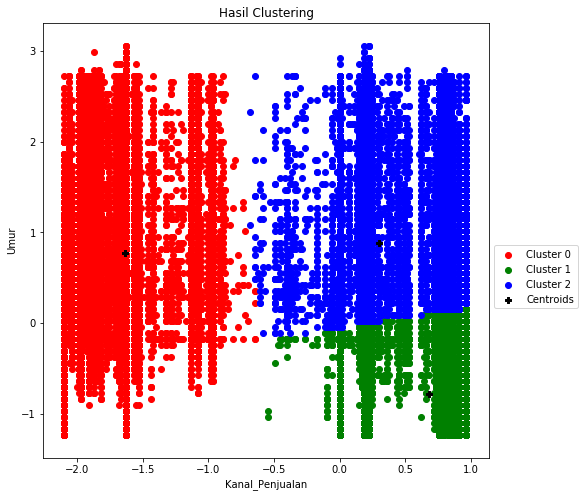

In [37]:
colors = ['r', 'g', 'b', 'y']

plt.figure(figsize=(8, 8))
plt.title('Hasil Clustering')
for i in range(NUM_K):
    plt.scatter(
        df_cluster[SELECTED_COLUMN[0]][df_cluster['Cluster'] == i], 
        df_cluster[SELECTED_COLUMN[1]][df_cluster['Cluster'] == i],
        color=colors[i],
        label=f'Cluster {i}'
    )
    plt.scatter(centroid[i][0], centroid[i][1], color='k', marker='P')
plt.scatter(centroid[0][0], centroid[0][1], color='k', label="Centroids", marker='P')
plt.xlabel(SELECTED_COLUMN[0])
plt.ylabel(SELECTED_COLUMN[1])
plt.legend(loc='best', bbox_to_anchor=(1, 0.5))
plt.show()

## Evaluasi nilai K dengan Elbow

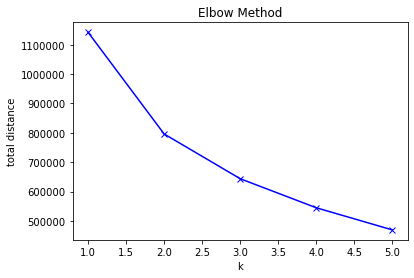

In [38]:
distances = []
K = range(1,6)
for k in K:
    km = KMeans(n_clusters=k)
    km = km.fit(df)
    distances.append(km.inertia_)

plt.plot(K, distances, 'bx-')
plt.xlabel('k')
plt.ylabel('total distance')
plt.title('Elbow Method')
plt.show()

INIT CENTROID
Klaster 1: [ 0.         -0.97087984]
ITERASI KE-1
Klaster 1: [-7.38915763e-16 -2.64107518e-16]
ITERASI KE-2
Klaster 1: [-7.38915763e-16 -2.64107518e-16]
BERHENTI PADA ITERASI KE 2
INIT CENTROID
Klaster 1: [0.22679287 0.34960737]
Klaster 2: [ 0.75679954 -0.77280676]
ITERASI KE-1
Klaster 1: [-0.62624096  0.73538121]
Klaster 2: [ 0.72072012 -0.84632604]
ITERASI KE-2
Klaster 1: [-0.80853754  0.86717149]
Klaster 2: [ 0.67314238 -0.72195766]
ITERASI KE-3
Klaster 1: [-0.90595374  0.91569294]
Klaster 2: [ 0.65143045 -0.65843346]
ITERASI KE-4
Klaster 1: [-0.97357787  0.94139794]
Klaster 2: [ 0.63837453 -0.61727416]
ITERASI KE-5
Klaster 1: [-1.02912358  0.95808573]
Klaster 2: [ 0.62857644 -0.58518737]
ITERASI KE-6
Klaster 1: [-1.06213758  0.96489407]
Klaster 2: [ 0.62375564 -0.56664798]
ITERASI KE-7
Klaster 1: [-1.08940819  0.97048663]
Klaster 2: [ 0.61929884 -0.55169518]
ITERASI KE-8
Klaster 1: [-1.09689241  0.970201  ]
Klaster 2: [ 0.61902122 -0.54752408]
ITERASI KE-9
Klaster 1: 

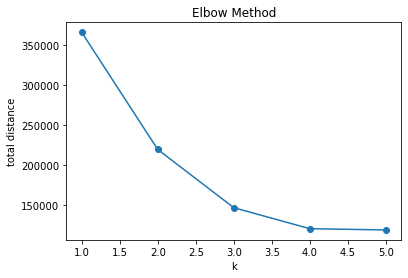

In [39]:
distances = []
cluster_all = []
K = range(1,6)
for k in K:
    _, _, w = kmeans(k,MAX_ITER,data)
    distances.append(w)

plt.plot(K, distances, marker='o')
plt.xlabel('k')
plt.ylabel('total distance')
plt.title('Elbow Method')
plt.show()

## Menyimpan hasil dataframe

In [40]:
df_clean.to_csv('kendaraan_train_clean_clustering.csv', encoding='utf-8', index=False)